In [1]:
import pandas as pd
import glob
import os
import numpy as np
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [3]:

# Specify the parent directory
parent_dir = r"C:\Users\lekya\OneDrive - Hanoi University of Science and Technology\dataset\Benign"

# Get a list of all subdirectories
subdirs = [os.path.join(parent_dir, d) for d in os.listdir(parent_dir) if os.path.isdir(os.path.join(parent_dir, d))]

# List to hold dataframes
df_list = []

for subdir in subdirs:
    # Get a list of all csv files in the subdirectory
    csv_files = glob.glob(os.path.join(subdir, '*.csv'))

    for filename in csv_files:
        df_list.append(pd.read_csv(filename))

# Concatenate all dataframes in the list
merged_df = pd.concat(df_list, ignore_index=True)

# Write the output to a new CSV file
merged_df.to_csv('benign.csv', index=False)


In [2]:
df1 = pd.read_csv("benign.csv")

In [3]:
print("----------------------------------NORMAL---------------------------------")
df1

----------------------------------NORMAL---------------------------------


,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,172.217.11.10-10.42.0.151-443-44928-6,10.42.0.151,44928,172.217.11.10,443,6,04/08/2017 09:04:29,36698,1,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,172.217.6.227-10.42.0.151-443-60060-6,10.42.0.151,60060,172.217.6.227,443,6,04/08/2017 09:04:30,871271,159,460,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,172.217.6.227-10.42.0.151-443-60060-6,10.42.0.151,60060,172.217.6.227,443,6,04/08/2017 09:04:31,41621,14,0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,172.217.12.142-10.42.0.151-443-38409-6,10.42.0.151,38409,172.217.12.142,443,6,04/08/2017 09:04:31,277,2,0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,172.217.12.142-10.42.0.151-443-38409-6,172.217.12.142,443,10.42.0.151,38409,6,04/08/2017 09:04:31,183,2,0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205510,10.42.0.151-104.244.42.193-35516-443-6,10.42.0.151,35516,104.244.42.193,443,6,23/06/2017 07:48:42,358849,16,12,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1205511,172.217.9.227-10.42.0.151-443-53732-17,10.42.0.151,53732,172.217.9.227,443,17,23/06/2017 07:44:34,719204,11,9,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1205512,172.217.11.10-10.42.0.151-443-41070-6,10.42.0.151,41070,172.217.11.10,443,6,23/06/2017 07:53:29,32853,2,0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1205513,10.42.0.151-31.13.71.36-49740-443-6,10.42.0.151,49740,31.13.71.36,443,6,23/06/2017 07:47:46,277941,10,7,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [8]:
# Specify the parent directories
parent_dirs = [r"C:\Users\lekya\OneDrive - Hanoi University of Science and Technology\dataset\Adware", 
               r'C:\Users\lekya\OneDrive - Hanoi University of Science and Technology\dataset\Ransomware', 
               r'C:\Users\lekya\OneDrive - Hanoi University of Science and Technology\dataset\SMSmalware', 
               r'C:\Users\lekya\OneDrive - Hanoi University of Science and Technology\dataset\Scareware']

# List to hold dataframes
df_list = []

for parent_dir in parent_dirs:
    # Get a list of all subdirectories
    subdirs = [os.path.join(parent_dir, d) for d in os.listdir(parent_dir) if os.path.isdir(os.path.join(parent_dir, d))]

    for subdir in subdirs:
        # Get a list of all csv files in the subdirectory
        csv_files = glob.glob(os.path.join(subdir, '*.csv'))

        for filename in csv_files:
            df_list.append(pd.read_csv(filename))

# Concatenate all dataframes in the list
merged_df = pd.concat(df_list, ignore_index=True)

# Write the output to a new CSV file
merged_df.to_csv('ransomware.csv', index=False)


In [4]:
df2 = pd.read_csv('ransomware.csv', low_memory=False)

In [ ]:
print("--------------------------------------MALWARE---------------------------------------------")
df2

--------------------------------------MALWARE---------------------------------------------


,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,172.217.0.238-10.42.0.211-443-54819-6,10.42.0.211,54819.0,172.217.0.238,443.0,6.0,14/06/2017 04:22:52,194.0,2.0,0.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ADWARE_DOWGIN
1,172.217.1.170-10.42.0.211-443-51023-6,10.42.0.211,51023.0,172.217.1.170,443.0,6.0,14/06/2017 04:22:52,5.0,2.0,0.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ADWARE_DOWGIN
2,172.217.2.110-10.42.0.211-443-39805-6,10.42.0.211,39805.0,172.217.2.110,443.0,6.0,14/06/2017 04:22:58,199542.0,9.0,8.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ADWARE_DOWGIN
3,172.217.2.110-10.42.0.211-443-39805-6,10.42.0.211,39805.0,172.217.2.110,443.0,6.0,14/06/2017 04:22:58,254.0,2.0,0.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ADWARE_DOWGIN
4,172.217.0.238-10.42.0.211-443-36040-6,172.217.0.238,443.0,10.42.0.211,36040.0,6.0,14/06/2017 04:22:59,2164751.0,1.0,3.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ADWARE_DOWGIN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1411059,10.42.0.151-10.42.0.1-27924-53-17,10.42.0.151,27924.0,10.42.0.1,53.0,17.0,28/08/2017 12:17:20,871054.0,1.0,1.0,...,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1411060,10.42.0.151-14.29.93.254-38206-80-6,14.29.93.254,80.0,10.42.0.151,38206.0,6.0,28/08/2017 12:19:17,5695.0,1.0,1.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1411061,10.42.0.151-10.42.0.1-8793-53-17,10.42.0.151,8793.0,10.42.0.1,53.0,17.0,28/08/2017 12:18:57,517476.0,1.0,1.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1411062,10.42.0.151-10.42.0.1-47497-53-17,10.42.0.151,47497.0,10.42.0.1,53.0,17.0,28/08/2017 12:22:43,1806.0,1.0,1.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [5]:
counts1 = df1[' Label'].value_counts()
counts2 = df2[' Label'].value_counts()
print(counts1)
print(counts2)

 Label
BENIGN    1205515
Name: count, dtype: int64
 Label
ADWARE_GOOLIGAN              93772
ADWARE_FEIWO                 56632
SCAREWARE_ANDROIDDEFENDER    56440
RANSOMWARE_SVPENG            54161
RANSOMWARE_PORNDROID         46082
SCAREWARE_FAKEAPPAL          44563
RANSOMWARE_KOLER             44555
SMSMALWARE_NANDROBOX         44517
ADWARE_EWIND                 43374
SCAREWARE_AVFORANDROID       42448
SCAREWARE_AVPASS             40776
SCAREWARE_FAKEAV             40089
RANSOMWARE_RANSOMBO          39859
SMSMALWARE_PLANKTON          39765
ADWARE_DOWGIN                39682
RANSOMWARE_CHARGER           39551
ADWARE_SHUANET               39271
ADWARE_KEMOGE                38771
RANSOMWARE_SIMPLOCKER        36340
ADWARE_YOUMI                 36035
SCAREWARE_FAKEAPP            34676
SMSMALWARE_BIIGE             33678
SMSMALWARE_SMSSNIFFER        33618
SCAREWARE_FAKETAOBAO         33299
RANSOMWARE_WANNALOCKER       32701
ADWARE_KOODOUS               32547
ADWARE_MOBIDASH              310

In [6]:
benign_rows = df2[df2[' Label'] == 'BENIGN']
benign_rows

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
804772,10.42.0.211-10.42.0.1-41381-53-17,10.42.0.211,41381.0,10.42.0.1,53.0,17.0,29/08/2017 10:21:54,31892.0,1.0,1.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
804773,202.77.129.161-10.42.0.211-443-41285-6,10.42.0.211,41285.0,202.77.129.161,443.0,6.0,29/08/2017 10:22:39,449.0,2.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
804774,10.42.0.211-10.42.0.1-56846-53-17,10.42.0.211,56846.0,10.42.0.1,53.0,17.0,29/08/2017 10:29:40,103247.0,1.0,1.0,...,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
804775,203.205.191.22-10.42.0.211-443-56968-6,10.42.0.211,56968.0,203.205.191.22,443.0,6.0,29/08/2017 10:03:25,419304.0,8.0,8.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
804776,10.42.0.211-10.42.0.1-12779-53-17,10.42.0.211,12779.0,10.42.0.1,53.0,17.0,29/08/2017 10:26:45,61539.0,1.0,1.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1411059,10.42.0.151-10.42.0.1-27924-53-17,10.42.0.151,27924.0,10.42.0.1,53.0,17.0,28/08/2017 12:17:20,871054.0,1.0,1.0,...,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1411060,10.42.0.151-14.29.93.254-38206-80-6,14.29.93.254,80.0,10.42.0.151,38206.0,6.0,28/08/2017 12:19:17,5695.0,1.0,1.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1411061,10.42.0.151-10.42.0.1-8793-53-17,10.42.0.151,8793.0,10.42.0.1,53.0,17.0,28/08/2017 12:18:57,517476.0,1.0,1.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1411062,10.42.0.151-10.42.0.1-47497-53-17,10.42.0.151,47497.0,10.42.0.1,53.0,17.0,28/08/2017 12:22:43,1806.0,1.0,1.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [5]:
df_malware = df2.copy()
df_malware[' Label'] = df_malware[' Label'].apply(lambda x: 'MALWARE' if x != 'BENIGN' else x)

In [6]:
counts = df_malware[' Label'].value_counts()
print(counts)
print(df_malware.shape[0])
print(df1.shape[0])

 Label
MALWARE    1406369
BENIGN        4695
Name: count, dtype: int64
1411064
1205515


In [7]:
df_walnor = pd.concat([df_malware, df1])
counts = df_walnor[' Label'].value_counts()
print(counts)

 Label
MALWARE    1406369
BENIGN     1210210
Name: count, dtype: int64


In [8]:
df_sampled = df_walnor.groupby(' Label').apply(lambda x: x.sample(frac=0.1))
df_sampled

Flow ID       Source IP  \
 Label                                                                      
BENIGN  625410     183.79.249.252-10.42.0.211-443-49571-6     10.42.0.211   
        117319     10.42.0.211-23.194.141.143-35355-443-6     10.42.0.211   
        982459       172.217.2.174-10.42.0.42-443-40200-6      10.42.0.42   
        742206     169.45.214.246-10.42.0.211-443-50109-6     10.42.0.211   
        579165      172.217.10.34-10.42.0.151-443-52569-6     10.42.0.151   
...                                                   ...             ...   
MALWARE 788317       10.42.0.42-119.146.74.33-47278-443-6      10.42.0.42   
        1006480     192.168.1.108-10.42.0.42-8004-33287-6      10.42.0.42   
        9665     10.42.0.211-111.221.77.148-54687-40010-6  111.221.77.148   
        1385821    192.229.173.173-10.42.0.42-443-54436-6      10.42.0.42   
        138856     10.42.0.151-103.235.46.211-36299-443-6     10.42.0.151   

                  Source Port   Destination IP   Destination Port   Protocol  \
 Label                                                                         
BENIGN  625410        49571.0   183.79.249.252              443.0        6.0   
        117319        35355.0   23.194.141.143              443.0        6.0   
        982459        40200.0    172.217.2.174              443.0        6.0   
        742206        50109.0   169.45.214.246              443.0        6.0   
        579165        52569.0    172.217.10.34              443.0        6.0   
...                       ...              ...                ...        ...   
MALWARE 788317        47278.0    119.146.74.33              443.0        6.0   
        1006480       33287.0    192.168.1.108             8004.0        6.0   
        9665          40010.0      10.42.0.211            54687.0        6.0   
        1385821       54436.0  192.229.173.173              443.0        6.0   
        138856        36299.0   103.235.46.211              443.0        6.0   

                           Timestamp   Flow Duration   Total Fwd Packets  \
 Label                                                                     
BENIGN  625410   07/07/2017 09:58:18      12623046.0                25.0   
        117319   05/08/2017 09:03:46         23472.0                 1.0   
        982459   20/06/2017 08:07:38      60071498.0                 3.0   
        742206   08/07/2017 12:21:30      80270272.0                31.0   
        579165   06/07/2017 09:52:56        257142.0                 8.0   
...                              ...             ...                 ...   
MALWARE 788317   04/07/2017 10:03:18      60510672.0                 3.0   
        1006480  17/08/2017 02:12:55       7004725.0                 4.0   
        9665     14/06/2017 06:30:39          2585.0                 1.0   
        1385821  26/06/2017 03:45:34      19981734.0                 8.0   
        138856   16/06/2017 04:45:56       2837342.0                 4.0   

                  Total Backward Packets  ...   min_seg_size_forward  \
 Label                                    ...                          
BENIGN  625410                      40.0  ...                   32.0   
        117319                       2.0  ...                   32.0   
        982459                       1.0  ...                   32.0   
        742206                      26.0  ...                   32.0   
        579165                       5.0  ...                   32.0   
...                                  ...  ...                    ...   
MALWARE 788317                       3.0  ...                   20.0   
        1006480                      0.0  ...                   40.0   
        9665                         1.0  ...                   32.0   
        1385821                     12.0  ...                   32.0   
        138856                       1.0  ...                   20.0   

                 Active Mean    Active Std   Active Max   Active Min  \
 Label   

In [9]:
df = df_sampled.reset_index(drop=True)
counts = df[' Label'].value_counts()
print(counts)

 Label
MALWARE    140637
BENIGN     121021
Name: count, dtype: int64


In [10]:
df = df.drop(['Flow ID',' Source IP',
              ' Destination IP',' Timestamp',' Flow IAT Min',
              ' Packet Length Std', ' CWE Flag Count', ' Down/Up Ratio','Fwd Avg Bytes/Bulk' ], axis=1)

In [11]:
labelencoder = LabelEncoder()
df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:, -1])

#Fill empty values by 0
df = df.fillna(0)
print('_________________DATA PREPROCESSING_________________')
df

_________________DATA PREPROCESSING_________________


,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,49571.0,443.0,6.0,12623046.0,25.0,40.0,2351.0,40041.0,504.0,0.0,...,32.0,2045523.0,0.000000e+00,2045523.0,2045523.0,10577480.00,0.000000e+00,10577480.0,10577480.0,0
1,35355.0,443.0,6.0,23472.0,1.0,2.0,0.0,31.0,0.0,0.0,...,32.0,0.0,0.000000e+00,0.0,0.0,0.00,0.000000e+00,0.0,0.0,0
2,40200.0,443.0,6.0,60071498.0,3.0,1.0,31.0,0.0,31.0,0.0,...,32.0,43864.0,0.000000e+00,43864.0,43864.0,60005481.00,0.000000e+00,60005481.0,60005481.0,0
3,50109.0,443.0,6.0,80270272.0,31.0,26.0,994.0,609.0,297.0,0.0,...,32.0,1637981.0,1.749897e+06,3162166.0,120318.0,18398730.75,9.132031e+06,31060445.0,9285713.0,0
4,52569.0,443.0,6.0,257142.0,8.0,5.0,778.0,637.0,470.0,0.0,...,32.0,0.0,0.000000e+00,0.0,0.0,0.00,0.000000e+00,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261653,47278.0,443.0,6.0,60510672.0,3.0,3.0,0.0,0.0,0.0,0.0,...,20.0,0.0,0.000000e+00,0.0,0.0,0.00,0.000000e+00,0.0,0.0,1
261654,33287.0,8004.0,6.0,7004725.0,4.0,0.0,0.0,0.0,0.0,0.0,...,40.0,0.0,0.000000e+00,0.0,0.0,0.00,0.000000e+00,0.0,0.0,1
261655,40010.0,54687.0,6.0,2585.0,1.0,1.0,0.0,0.0,0.0,0.0,...,32.0,0.0,0.000000e+00,0.0,0.0,0.00,0.000000e+00,0.0,0.0,1
261656,54436.0,443.0,6.0,19981734.0,8.0,12.0,342.0,5275.0,216.0,0.0,...,32.0,167435.0,0.000000e+00,167435.0,167435.0,19814270.00,0.000000e+00,19814270.0,19814270.0,1


In [12]:
#Fill empty values by 0
#df = df.fillna(0)

from sklearn.preprocessing import LabelEncoder

#labelencoder = LabelEncoder()
#df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:, -1])
features = df.dtypes[df.dtypes != 'object'].index
df[features] = df[features].apply(lambda x: (x - x.mean()) / (x.std()))

y = df.iloc[:, -1]
label_encoded_y = LabelEncoder().fit_transform(y)
X = df.drop([' Label'], axis=1)
#y = df.iloc[:, -1].values.reshape(-1,1)
# y = np.ravel(y)
# y = y.astype('float')

df

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0.581798,-0.347682,-0.502111,0.082080,0.249962,0.120438,0.037703,0.079772,0.701949,-0.214054,...,0.001434,2.098736,-0.066237,1.735699,2.271629,0.441700,-0.111588,0.401349,0.470750,-1.078000
1,-0.190154,-0.347682,-0.502111,-0.490695,-0.109611,-0.044910,-0.024450,-0.041366,-0.521059,-0.214054,...,0.001434,-0.171402,-0.066237,-0.163984,-0.162979,-0.280778,-0.111588,-0.285888,-0.269690,-1.078000
2,0.072937,-0.347682,-0.502111,2.239081,-0.079646,-0.049261,-0.023630,-0.041460,-0.445835,-0.214054,...,0.001434,-0.122722,-0.066237,-0.123247,-0.110771,3.817803,-0.111588,3.612774,3.930788,-1.078000
3,0.611012,-0.347682,-0.502111,3.157315,0.339855,0.059520,0.001828,-0.039616,0.199642,-0.214054,...,0.001434,1.646442,5.139535,2.772728,-0.019775,0.975918,2.916857,1.732164,0.380325,-1.078000
4,0.744594,-0.347682,-0.502111,-0.480073,-0.004735,-0.031856,-0.003882,-0.039531,0.619444,-0.214054,...,0.001434,-0.171402,-0.066237,-0.163984,-0.162979,-0.280778,-0.111588,-0.285888,-0.269690,-1.078000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261653,0.457284,-0.347682,-0.502111,2.259046,-0.079646,-0.040559,-0.024450,-0.041460,-0.521059,-0.214054,...,0.001431,-0.171402,-0.066237,-0.163984,-0.162979,-0.280778,-0.111588,-0.285888,-0.269690,0.927641
261654,-0.302450,0.155375,-0.502111,-0.173328,-0.064664,-0.053613,-0.024450,-0.041460,-0.521059,-0.214054,...,0.001436,-0.171402,-0.066237,-0.163984,-0.162979,-0.280778,-0.111588,-0.285888,-0.269690,0.927641
261655,0.062620,3.261344,-0.502111,-0.491645,-0.109611,-0.049261,-0.024450,-0.041460,-0.521059,-0.214054,...,0.001434,-0.171402,-0.066237,-0.163984,-0.162979,-0.280778,-0.111588,-0.285888,-0.269690,0.927641
261656,0.845975,-0.347682,-0.502111,0.416605,-0.004735,-0.001397,-0.015408,-0.025489,0.003087,-0.214054,...,0.001434,0.014418,-0.066237,-0.008486,0.036304,1.072604,-0.111588,1.001480,1.117340,0.927641


In [13]:
df.dtypes.value_counts()

float64    76
Name: count, dtype: int64

Accuracy: 0.62174288575163
Precision: 0.6258571627083623
Recall: 0.7365771454169244
F1 Score: 0.6767182529054007


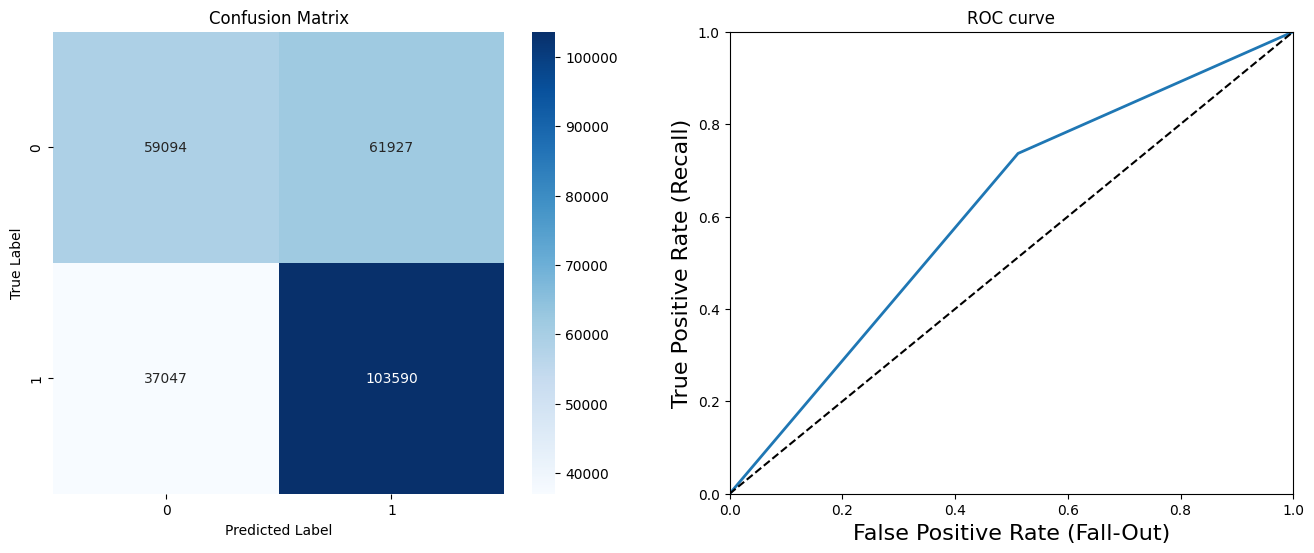

In [24]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.metrics import roc_curve

model = XGBClassifier()
kfold = KFold(n_splits=10, shuffle=True, random_state=7)
y_pred = cross_val_predict(model, X, label_encoded_y, cv=kfold)
print(f"Accuracy: {accuracy_score(label_encoded_y, y_pred)}")
print(f"Precision: {precision_score(label_encoded_y, y_pred)}")
print(f"Recall: {recall_score(label_encoded_y, y_pred)}")
print(f"F1 Score: {f1_score(label_encoded_y, y_pred)}")

# Compute the confusion matrix
cm = confusion_matrix(label_encoded_y, y_pred)

# Plot the heatmap
fpr, tpr, thresholds = roc_curve(label_encoded_y, y_pred)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot the confusion matrix on the first subplot
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_title('Confusion Matrix')
ax1.set_xlabel('Predicted Label')
ax1.set_ylabel('True Label')

# Plot the ROC curve on the second subplot
ax2.plot(fpr, tpr, linewidth=2)
ax2.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
ax2.axis([0, 1, 0, 1])
ax2.set_xlabel('False Positive Rate (Fall-Out)', fontsize=16)
ax2.set_ylabel('True Positive Rate (Recall)', fontsize=16)
ax2.set_title('ROC curve')

# Display the figure with the two subplots
plt.show()


Fitting 10 folds for each of 13 candidates, totalling 130 fits
Best: 0.623103 using {'learning_rate': 0.35}
0.537484 (0.002188) with: {'learning_rate': 0.0001}
0.537526 (0.002247) with: {'learning_rate': 0.001}
0.576898 (0.002190) with: {'learning_rate': 0.01}
0.600410 (0.002639) with: {'learning_rate': 0.05}
0.609853 (0.004044) with: {'learning_rate': 0.1}
0.614344 (0.003954) with: {'learning_rate': 0.15}
0.618942 (0.003060) with: {'learning_rate': 0.2}
0.620925 (0.002410) with: {'learning_rate': 0.25}
0.621743 (0.003082) with: {'learning_rate': 0.3}
0.623103 (0.002152) with: {'learning_rate': 0.35}
0.622809 (0.002294) with: {'learning_rate': 0.4}
0.622951 (0.002634) with: {'learning_rate': 0.45}
0.622427 (0.001887) with: {'learning_rate': 0.5}


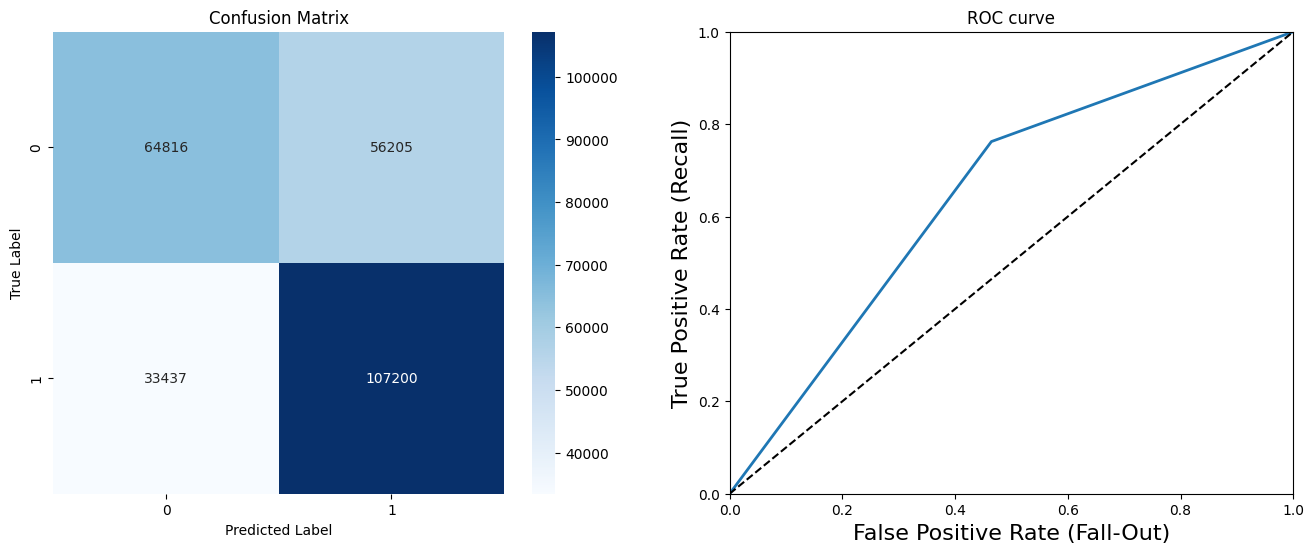

In [26]:
model = XGBClassifier()
learning_rate = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
param_grid = dict(learning_rate=learning_rate)

kfold = KFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="accuracy", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X, label_encoded_y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

best_model = grid_result.best_estimator_
y_pred = best_model.predict(X)

# Compute the confusion matrix
cm = confusion_matrix(label_encoded_y, y_pred)

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(label_encoded_y, y_pred)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot the confusion matrix on the first subplot
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_title('Confusion Matrix')
ax1.set_xlabel('Predicted Label')
ax1.set_ylabel('True Label')

# Plot the ROC curve on the second subplot
ax2.plot(fpr, tpr, linewidth=2)
ax2.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
ax2.axis([0, 1, 0, 1])
ax2.set_xlabel('False Positive Rate (Fall-Out)', fontsize=16)
ax2.set_ylabel('True Positive Rate (Recall)', fontsize=16)
ax2.set_title('ROC curve')

# Display the figure with the two subplots
plt.show()

In [16]:
from sklearn.feature_selection import RFECV

kfold = KFold(n_splits=10, shuffle=True, random_state=7)
xgb_rfe = XGBClassifier(n_estimators=500, learning_rate=0.1, max_depth=3)
rfe = RFECV(estimator=xgb_rfe, min_features_to_select=20, cv=kfold, verbose=1, n_jobs=-1)
rfe.fit(X=X, y=label_encoded_y)

Fitting estimator with 75 features.
Fitting estimator with 74 features.
Fitting estimator with 73 features.
Fitting estimator with 72 features.
Fitting estimator with 71 features.
Fitting estimator with 70 features.
Fitting estimator with 69 features.
Fitting estimator with 68 features.
Fitting estimator with 67 features.
Fitting estimator with 66 features.
Fitting estimator with 65 features.
Fitting estimator with 64 features.
Fitting estimator with 63 features.
Fitting estimator with 62 features.
Fitting estimator with 61 features.
Fitting estimator with 60 features.
Fitting estimator with 59 features.
Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 fe

RFECV(cv=KFold(n_splits=10, random_state=7, shuffle=True),
      estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=3, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=500, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...),
      min_features_to_select=20, n_jobs=-1, verbose=1)

In [17]:
c = pd.DataFrame(zip(X.columns, rfe.support_, rfe.ranking_), columns=['feature', 'support', 'ranking'])
d = c[c['support'] == True]
d

,feature,support,ranking
1,Destination Port,True,1
3,Flow Duration,True,1
6,Total Length of Fwd Packets,True,1
7,Total Length of Bwd Packets,True,1
8,Fwd Packet Length Max,True,1
10,Fwd Packet Length Mean,True,1
11,Fwd Packet Length Std,True,1
12,Bwd Packet Length Max,True,1
14,Bwd Packet Length Mean,True,1
15,Bwd Packet Length Std,True,1


Accuracy: 0.6077131217084897
Precision: 0.6075980197795475
Recall: 0.7627366909134865
F1 Score: 0.6763855566029705


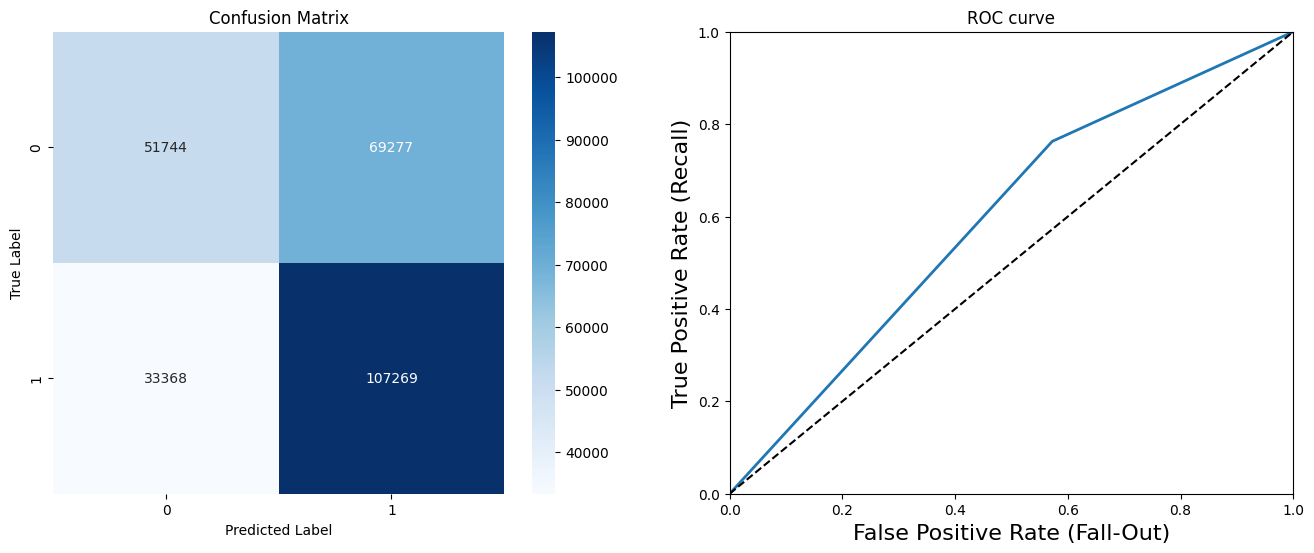

In [18]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.metrics import roc_curve

model = XGBClassifier(n_estimators=500, learning_rate=0.1, max_depth=3)
kfold = KFold(n_splits=10, shuffle=True, random_state=7)
y_pred = cross_val_predict(model, X, label_encoded_y, cv=kfold)
results = cross_val_score(model, X, label_encoded_y, cv=kfold)
print(f"Accuracy: {accuracy_score(label_encoded_y, y_pred)}")
print(f"Precision: {precision_score(label_encoded_y, y_pred)}")
print(f"Recall: {recall_score(label_encoded_y, y_pred)}")
print(f"F1 Score: {f1_score(label_encoded_y, y_pred)}")

cm = confusion_matrix(label_encoded_y, y_pred)

# Plot the heatmap
fpr, tpr, thresholds = roc_curve(label_encoded_y, y_pred)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot the confusion matrix on the first subplot
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_title('Confusion Matrix')
ax1.set_xlabel('Predicted Label')
ax1.set_ylabel('True Label')

# Plot the ROC curve on the second subplot
ax2.plot(fpr, tpr, linewidth=2)
ax2.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
ax2.axis([0, 1, 0, 1])
ax2.set_xlabel('False Positive Rate (Fall-Out)', fontsize=16)
ax2.set_ylabel('True Positive Rate (Recall)', fontsize=16)
ax2.set_title('ROC curve')

# Display the figure with the two subplots
plt.show()

Accuracy: 0.5906909018642655
Precision: 0.591175511091779
Recall: 0.7731180272616737
F1 Score: 0.6700148202010741


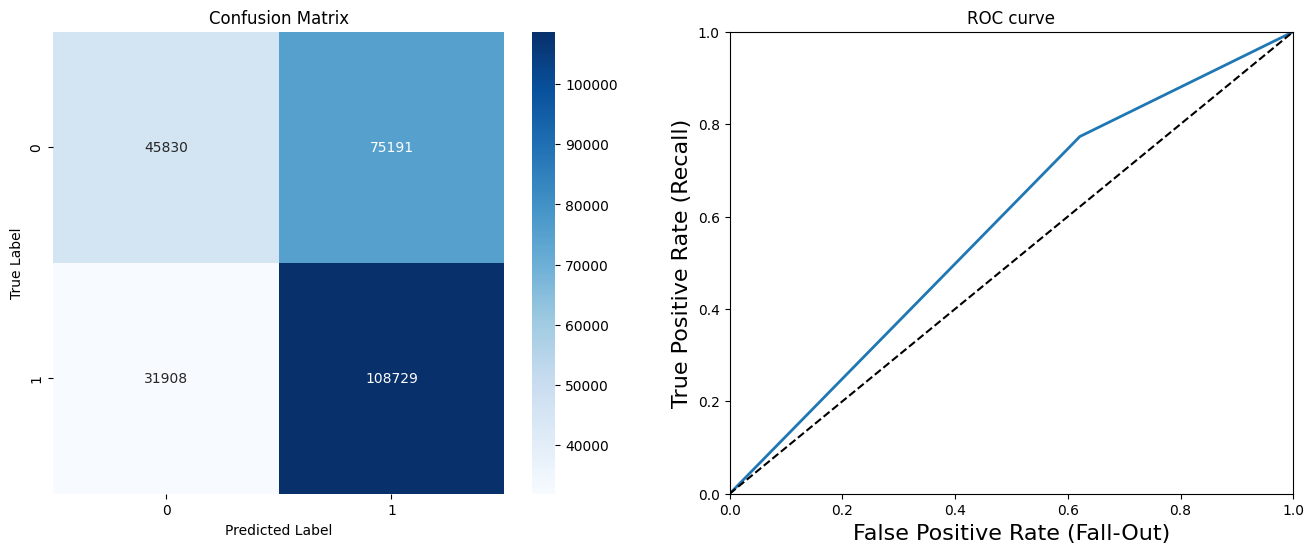

In [16]:
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.metrics import roc_curve

X=X.fillna(0)
xgb = XGBClassifier(n_estimators=500, learning_rate=0.1, max_depth=3)
pca = PCA()
X_pca = pca.fit_transform(X)
kfold = KFold(n_splits=10, shuffle=True, random_state=7)
results = cross_val_score(xgb, X_pca, label_encoded_y, cv=kfold)
y_pred = cross_val_predict(xgb, X_pca, label_encoded_y, cv=kfold)
print(f"Accuracy: {accuracy_score(label_encoded_y, y_pred)}")
print(f"Precision: {precision_score(label_encoded_y, y_pred)}")
print(f"Recall: {recall_score(label_encoded_y, y_pred)}")
print(f"F1 Score: {f1_score(label_encoded_y, y_pred)}")

cm = confusion_matrix(label_encoded_y, y_pred)

fpr, tpr, thresholds = roc_curve(label_encoded_y, y_pred)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot the confusion matrix on the first subplot
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_title('Confusion Matrix')
ax1.set_xlabel('Predicted Label')
ax1.set_ylabel('True Label')

# Plot the ROC curve on the second subplot
ax2.plot(fpr, tpr, linewidth=2)
ax2.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
ax2.axis([0, 1, 0, 1])
ax2.set_xlabel('False Positive Rate (Fall-Out)', fontsize=16)
ax2.set_ylabel('True Positive Rate (Recall)', fontsize=16)
ax2.set_title('ROC curve')

# Display the figure with the two subplots
plt.show()

Accuracy: 0.5730189789725519
Precision: 0.5776815363287588
Recall: 0.7644503224613722
F1 Score: 0.6580707161285781


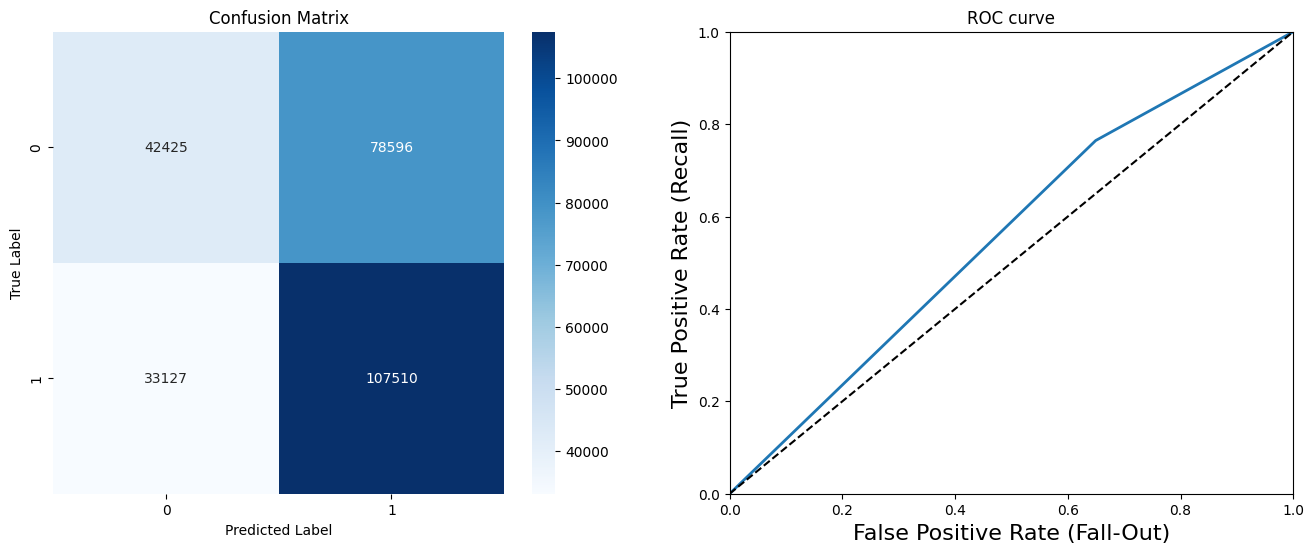

In [17]:
from sklearn import svm

svm_clf = svm.SVC().fit(X, label_encoded_y)
y_pred = svm_clf.predict(X)
print(f"Accuracy: {accuracy_score(label_encoded_y, y_pred)}")
print(f"Precision: {precision_score(label_encoded_y, y_pred)}")
print(f"Recall: {recall_score(label_encoded_y, y_pred)}")
print(f"F1 Score: {f1_score(label_encoded_y, y_pred)}")

cm = confusion_matrix(label_encoded_y, y_pred)

fpr, tpr, thresholds = roc_curve(label_encoded_y, y_pred)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot the confusion matrix on the first subplot
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_title('Confusion Matrix')
ax1.set_xlabel('Predicted Label')
ax1.set_ylabel('True Label')

# Plot the ROC curve on the second subplot
ax2.plot(fpr, tpr, linewidth=2)
ax2.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
ax2.axis([0, 1, 0, 1])
ax2.set_xlabel('False Positive Rate (Fall-Out)', fontsize=16)
ax2.set_ylabel('True Positive Rate (Recall)', fontsize=16)
ax2.set_title('ROC curve')

# Display the figure with the two subplots
plt.show()

Accuracy: 0.5553967392550582
Precision: 0.5512040958220087
Recall: 0.9301179632671346
F1 Score: 0.6921990093980188


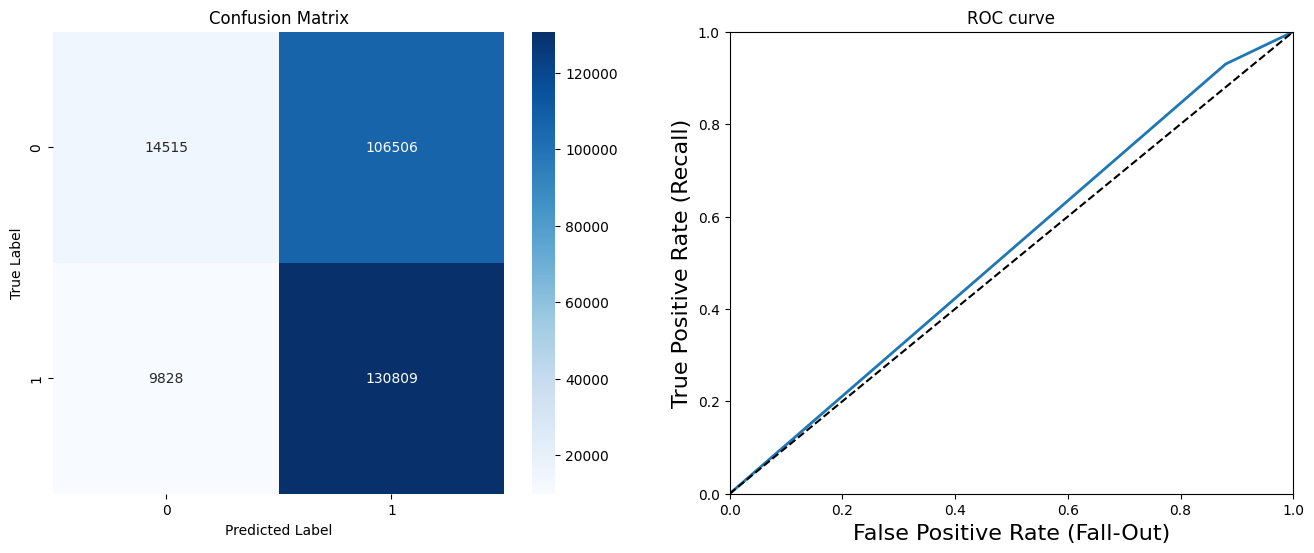

In [18]:
from sklearn.ensemble import RandomForestClassifier

rrf = RandomForestClassifier(n_estimators=500, max_depth=3, criterion='gini', bootstrap=False, random_state=42).fit(X, label_encoded_y)
y_pred = rrf.predict(X)

print(f"Accuracy: {accuracy_score(label_encoded_y, y_pred)}")
print(f"Precision: {precision_score(label_encoded_y, y_pred)}")
print(f"Recall: {recall_score(label_encoded_y, y_pred)}")
print(f"F1 Score: {f1_score(label_encoded_y, y_pred)}")

cm = confusion_matrix(label_encoded_y, y_pred)

fpr, tpr, thresholds = roc_curve(label_encoded_y, y_pred)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot the confusion matrix on the first subplot
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_title('Confusion Matrix')
ax1.set_xlabel('Predicted Label')
ax1.set_ylabel('True Label')

# Plot the ROC curve on the second subplot
ax2.plot(fpr, tpr, linewidth=2)
ax2.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
ax2.axis([0, 1, 0, 1])
ax2.set_xlabel('False Positive Rate (Fall-Out)', fontsize=16)
ax2.set_ylabel('True Positive Rate (Recall)', fontsize=16)
ax2.set_title('ROC curve')

# Display the figure with the two subplots
plt.show()

Accuracy: 0.6147681324476989
Precision: 0.6107755792096278
Recall: 0.7809182505315102
F1 Score: 0.6854464489110659


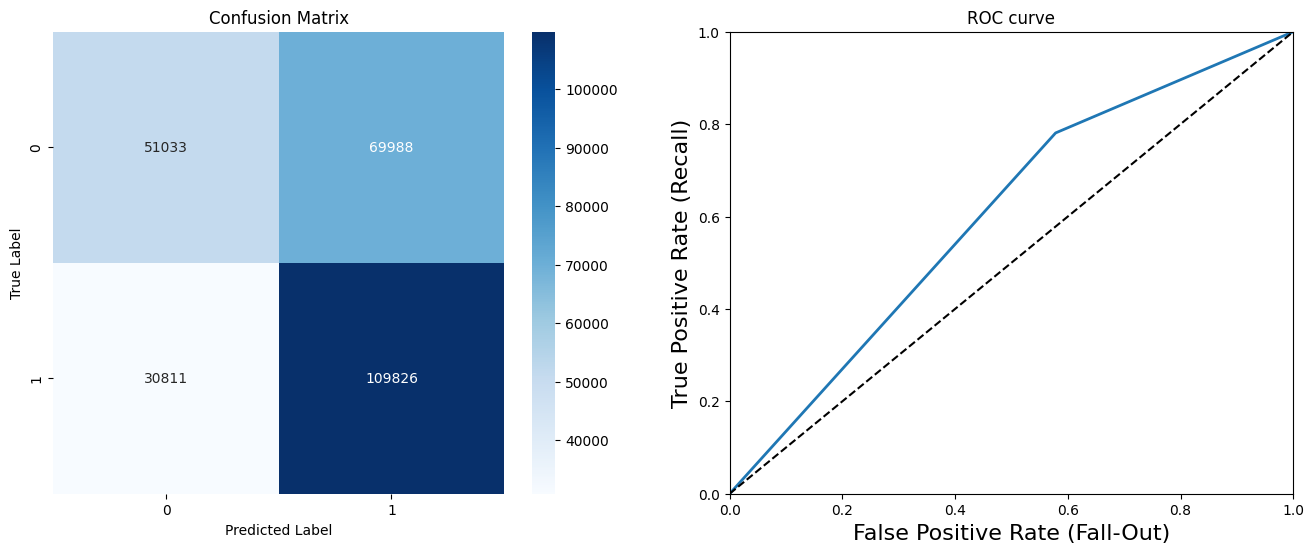

In [19]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(n_estimators=500, random_state = 5, max_depth=3, verbose = -1).fit(X, label_encoded_y)
lgbm.fit(X, label_encoded_y)
y_pred = lgbm.predict(X)

print(f"Accuracy: {accuracy_score(label_encoded_y, y_pred)}")
print(f"Precision: {precision_score(label_encoded_y, y_pred)}")
print(f"Recall: {recall_score(label_encoded_y, y_pred)}")
print(f"F1 Score: {f1_score(label_encoded_y, y_pred)}")

cm = confusion_matrix(label_encoded_y, y_pred)

fpr, tpr, thresholds = roc_curve(label_encoded_y, y_pred)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot the confusion matrix on the first subplot
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_title('Confusion Matrix')
ax1.set_xlabel('Predicted Label')
ax1.set_ylabel('True Label')

# Plot the ROC curve on the second subplot
ax2.plot(fpr, tpr, linewidth=2)
ax2.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
ax2.axis([0, 1, 0, 1])
ax2.set_xlabel('False Positive Rate (Fall-Out)', fontsize=16)
ax2.set_ylabel('True Positive Rate (Recall)', fontsize=16)
ax2.set_title('ROC curve')

# Display the figure with the two subplots
plt.show()